## Domácí úkol - Batoh

Za domácí úkol budete mít vyřešit pomocí evolučního algoritmu problém batohu. Ten spočívá v tom, že máme batoh kapacity K a N předmětů, každý s cenou c<sub>i</sub> a objemem v<sub>i</sub> a chceme vybrat takové věci, abychom maximalizovali zisk a zároveň abychom nepřekročili kapacitu batohu. 

Vstupní data máte ve složce *domaci_ukol_data*. Obsahuje čtyři soubory s daty a dva s výsledky. Na první řádce souboru s daty je vždy počet předmětů a kapacita batohu oddělené mezerou, každý další následující řádek obsahuje cenu a objem předmětu taktéž oddělené mezerou. První dva soubory slouží pro snažší odladění evolučního algoritmu a obsahují i k sobě extra soubory s optimálním řešením. Na dalších dvou máte za úkol algoritmus pustit a výsledky na nich naměřené mi poslat. 

Napište tedy nějaký svůj evoluční algoritmus, který bude řešit problém batohu a pusťte ho na vstupních datech. Svůj kód, popis evolučního algoritmu (zvolené evoluční operátory, kódování jedince, atd.) a rozbor výsledků, včetně nejlepšího dosaženého skóre i s jejich odůvodněním mi pošlete emailem do stanoveného deadline.  Pro sepsání popisu vašeho evolučního algoritmu, parametrů evoluce, zvolené reprezentace jedince a rozboru výsledků použijte [tento template](https://github.com/kackamac/Prirodou-inspirovane-algoritmy/blob/master/04_spojita_reprezentace/DU1_evolucni_algoritmy.pdf).

##### Importy

In [16]:
import array
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import my_algorithms

Inicializácia random itemov a veľkosť batohu

In [2]:
# random.seed(64)
random.seed()
items_count = 20

weight_bounds = (10,200)
price_bounds = (10,200)

weights = random.sample(range(weight_bounds[0],weight_bounds[1]), items_count)
prices = random.sample(range(price_bounds[0],price_bounds[1]), items_count)

max_weight = 1000

Načítanie batohu zo súboru

In [3]:
#import weights and prices from txt file

def load_input_data(file_path):

    weights = []
    prices = []

    with open(file_path) as file:
        line_split = file.readline().split(" ")
        items_count = int(line_split[0])
        max_weight = int(line_split[1])
        for i in range(items_count):
            line_split = file.readline().split(" ")
            prices.append(int(line_split[0]))
            weights.append(int(line_split[1]))

    return weights, prices, max_weight

### Sedond try - permutation individual

#### fitness funkcia 
berieme predmety v poradí permutácie, kým nenaplníme batoh. Ostatné zahodíme

In [4]:
def fitness_batoh_perm(individual):
    total_price = 0
    total_weight = 0
    for item in individual:
        total_weight += weights[item]
        if total_weight > max_weight:
            return total_price,
        total_price += prices[item]
    return total_price,

#### mutácia
náhodný počet transpozícií od 1 do transposition_count.

In [6]:
def mut_transposition(individual, indv_size, transposition_count):
    count = random.randint(1, transposition_count)

    for i in range(count):
        pos_1 = random.randint(0, indv_size - 1)
        pos_2 = random.randint(0, indv_size - 1)

        individual[pos_1], individual[pos_2] = individual[pos_2], individual[pos_1]

    return individual,

#### Toolbox a deap prostredie
- mutácia - PMX
- selekcia - tournament s tromi kolami

In [9]:
weights, prices, max_weight = load_input_data(file_path = "./domaci_ukol_data/input_data_1000.txt")
indv_size = len(weights)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("indices", random.sample, range(indv_size), indv_size)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_batoh_perm)

# toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb = 0.1)
toolbox.register("mutate", mut_transposition, indv_size=indv_size, transposition_count = 20)
toolbox.register("select", tools.selTournament, tournsize = 3)

c:\Users\llama\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\llama\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


#### Evolučný algoritmus
- parametry
- štatistiky
- hall of fmae (najlepší jedinec)

In [38]:
POP_SIZE = 500
GEN_COUNT = 10_000


pop = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.4, ngen=GEN_COUNT,
                               stats=stats, halloffame=hof, verbose=True)

print(hof)
print(fitness_batoh_perm(hof[0]))

gen	nevals	avg    	std   	min 	max 
0  	500   	4530.47	1218.3	1351	9114
1  	398   	5487.22	1112.68	2257	9125
2  	424   	6298.71	1088.23	3339	9583
3  	387   	6948.66	1065.87	3329	10460
4  	409   	7468.69	1003.88	4023	10643
5  	413   	7919.34	1062.11	3884	10751
6  	398   	8531.13	1067.6 	4484	11557
7  	422   	8911.57	1125.01	4413	12217
8  	409   	9329.68	1188.58	5353	12297
9  	401   	9844.45	1186.96	5507	13960
10 	402   	10379.1	1156.95	5965	13398
11 	416   	10749.2	1246.61	5991	13349
12 	416   	11208.8	1158.96	6787	13764
13 	401   	11651.1	1179.27	7366	15432
14 	428   	12047.6	1213.26	7223	15432
15 	400   	12469.6	1233.74	7449	16425
16 	425   	12806.2	1285.45	8048	17062
17 	420   	13210.7	1260.23	8911	17062
18 	411   	13500.3	1415.82	5354	17062
19 	401   	13837.5	1439.11	6135	18630
20 	424   	14247.1	1487.63	7176	18630
21 	393   	14585.3	1564.05	9428	18630
22 	424   	15013.5	1679.61	6283	19189
23 	399   	15561.6	1436.2 	9493	19189
24 	418   	15912.6	1482.24	10534	19246
25 	407   	16221.

KeyboardInterrupt: 

In [17]:
print(hof)
print(fitness_batoh_perm(hof[0]))

[[855, 269, 13, 914, 669, 245, 38, 822, 48, 849, 657, 737, 53, 476, 937, 379, 273, 137, 830, 446, 147, 121, 945, 494, 421, 463, 37, 732, 334, 599, 743, 736, 382, 6, 10, 992, 967, 986, 249, 480, 32, 25, 775, 469, 603, 216, 254, 573, 426, 473, 821, 770, 903, 610, 419, 151, 347, 362, 493, 987, 845, 373, 708, 989, 751, 824, 281, 146, 612, 134, 539, 60, 886, 215, 592, 703, 739, 786, 23, 716, 483, 611, 890, 555, 965, 651, 537, 909, 878, 729, 329, 931, 975, 766, 438, 43, 363, 771, 418, 927, 437, 380, 745, 150, 19, 988, 133, 454, 375, 780, 346, 246, 420, 496, 90, 968, 601, 196, 204, 59, 629, 713, 585, 803, 230, 460, 492, 582, 277, 619, 873, 367, 107, 404, 563, 735, 406, 664, 723, 648, 368, 163, 100, 575, 513, 349, 201, 951, 623, 191, 356, 490, 644, 837, 320, 697, 511, 659, 801, 219, 502, 84, 799, 572, 466, 55, 674, 83, 836, 715, 606, 712, 654, 865, 615, 229, 441, 551, 544, 596, 298, 442, 912, 126, 159, 283, 832, 844, 44, 359, 607, 826, 222, 499, 625, 210, 804, 360, 31, 792, 765, 71, 464, 520, 

In [15]:
print(stats)

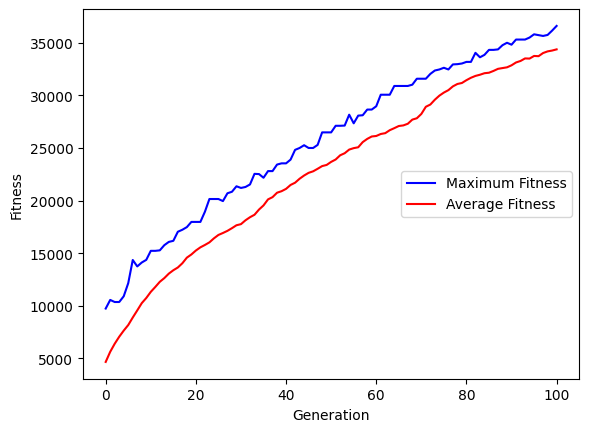

In [39]:
gen = log.select("gen")
maxs = log.select("max")
avgs = log.select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, maxs, "b-", label="Maximum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")


line2 = ax1.plot(gen, avgs, "r-", label="Average Fitness")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()

#### first try - binárny jedinci

max fitness (cena ju zvyšuje a váha prekročená cez max nosnosť batohu prináša postihy)

In [ ]:
def fitness_batoh_bin(individual):
    total_price = np.sum(np.array(individual) @ np.array(prices))
    total_weight = np.sum(np.array(individual) @ np.array(weights))

    if total_weight <= max_weight:
        return total_price,
    else:
        return 1,

Vytvorenie prostredia (knižnica Deap)

In [ ]:
weights, prices = load_input_data(file_path = "./domaci_ukol_data/input_data_100.txt")
indv_size = len(weights)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, indv_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_batoh_bin)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
toolbox.register("select", tools.selRoulette)

Final part

In [ ]:
pop = toolbox.population(n=500)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=200, 
                               stats=stats, halloffame=hof, verbose=True)